#################### 准备数据 ####################


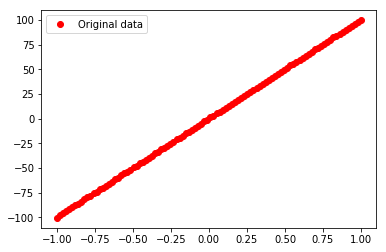

#################### 搭建模型 ####################
#################### 训练模型 ####################
100
Epoch: 1 loss= 1406.198 W= [42.75896] b= [17.029459]
Epoch: 11 loss= 0.09393453 W= [99.99162] b= [0.03833568]
Epoch: 21 loss= 0.09176764 W= [100.060394] b= [0.011945]
Epoch: 31 loss= 0.09176778 W= [100.060455] b= [0.011921]
Epoch: 41 loss= 0.09176778 W= [100.060455] b= [0.01192099]
Epoch: 51 loss= 0.09176778 W= [100.060455] b= [0.011921]
Epoch: 61 loss= 0.09176778 W= [100.060455] b= [0.01192099]
Epoch: 71 loss= 0.09176778 W= [100.060455] b= [0.011921]
Epoch: 81 loss= 0.09176778 W= [100.060455] b= [0.01192099]
Epoch: 91 loss= 0.09176778 W= [100.060455] b= [0.011921]
Model training Fnished
cost =  0.09176778 W= [100.060455] b= [0.01192096]
#################### 使用模型 ####################
x = (-0.5,) z= [-50.018307]
x = (-0.45517241379310347,) z= [-45.532837]
x = (-0.4103448275862069,) z= [-41.04737]
x = (-0.36551724137931035,) z= [-36.5619]
x = (-0.32068965517241377,) z= [-32.07643]
x = (-0.27

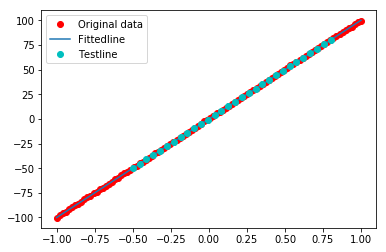

plotdata[avgloss]: [1406.198, 0.09393453, 0.09176764, 0.09176778, 0.09176778, 0.09176778, 0.09176778, 0.09176778, 0.09176778, 0.09176778]


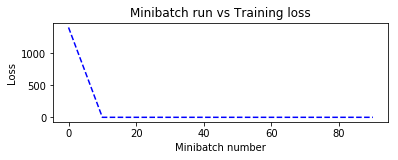

In [51]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#准备数据
print('#'*20,'准备数据','#'*20)
#功能：在指定的问题内返回均匀问题的数字
#start：scalar标量 开始点
#stop：scalar 结束点
#num：int,optional(可选) 生成的样本数，默认是50，必须是非负
train_X = np.linspace(-1,1,100)#x轴数据点
test_X = np.linspace(-0.5,0.8,30)#生成测试数据
#test code
#print(type(train_X))
#print(train_X.shape[0])
#print(train_X.size)
#np.random.randn随机产生正态分布的值，不一定在-1 1之间
#train_X.shape是查看矩阵或者数组的维度
train_Y = 100 * train_X + np.random.randn(train_X.shape[0])*0.3#这个数据必须是由一定误差的，不然就过拟合了，没有意义了
#train_Y = 2 * train_X + np.random.randn(*(100,))*0.3
#print(type(train_Y))
#print(type(train_Y.shape))
#print((np.random.randn(*train_X.shape)))
plt.plot(train_X,train_Y,'ro',label='Original data')
plt.legend()
plt.show()

#搭建模型
print('#'*20,'搭建模型','#'*20)
#正向模型搭建
#创建模型
#占位符
X = tf.placeholder('float')
Y = tf.placeholder('float')
#模型参数
W = tf.Variable(tf.random_normal([1]),name='Weight')#随机生成-1 1之间的正太分布的值
b = tf.Variable(tf.zeros([1]),name='Bias')
#向前结构
#两个数相乘加上b
z = tf.multiply(X,W) + b
#反向模型搭建
#反向优化
#tf.square(Y-X) 真实值的平方差
#tf.reduce_mean 沿着tensor某一个维度计算元素的平均值
cost = tf.reduce_mean(tf.square(Y-z))
#learn_rate 学习率，代表调整模型的速度，值小于一
#GradientDescentOptimizer是一个梯度下贱算法
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

def moving_average(a,w=10):
    if len(a) < w:
        return a[:]
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx,val in enumerate(a)]
#训练模型
print('#'*20,'训练模型','#'*20)
#初始化所有变量
init = tf.global_variables_initializer()
#定义参数
training_epochs = train_X.size#注意，这里的训练次数肯定不准确，这里指的是所有数据个数，而不是某个数据的训练次数
#因为具体某个数据的训练epochs是在tensorflow中的GradientDescentOptimizer梯度下降决定具体需要训练多少次
print(training_epochs)
display_step = 10
plotdata = {'batchsize':[],'loss':[]}
#启动session会话
with tf.Session() as sess:
    sess.run(init)
    #想模型输入数据
    for epoch in range(training_epochs):
        for (x,y) in zip(train_X,train_Y):
            sess.run(optimizer,feed_dict={X:x,Y:y})
        #显示训练的详细信息
        if epoch % display_step == 0:
            loss = sess.run(cost,feed_dict={X:train_X,Y:train_Y})
            print('Epoch:',epoch + 1,'loss=',loss,'W=',sess.run(W),'b=',sess.run(b))
            if not (loss == 'NA'):
                plotdata['batchsize'].append(epoch)
                plotdata['loss'].append(loss)
    print('Model training Fnished')
    print('cost = ',sess.run(cost,feed_dict={X:train_X,Y:train_Y}),'W=',sess.run(W),'b=',sess.run(b))
    print('#'*20,'使用模型','#'*20)
    for x in zip(test_X):
        print('x =',x,'z=',sess.run(z,feed_dict={X:x}))

#x训练图可视化
    plt.plot(train_X,train_Y,'ro',label='Original data')
    plt.plot(train_X,sess.run(W)*train_X + sess.run(b),label='Fittedline')
    #测试数据显示
    plt.plot(test_X,sess.run(W)*test_X + sess.run(b),'co',label='Testline')
    plt.legend()
    plt.show()
    
    plotdata['avgloss'] = moving_average(plotdata['loss'])
    print('plotdata[avgloss]:',plotdata['avgloss'])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata['batchsize'],plotdata['avgloss'],'b--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch run vs Training loss')
    plt.show()